In [102]:
# import required libraries

import numpy as np
import pandas as pd

#webscraping
import requests
from bs4 import BeautifulSoup

#tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#vectorize
from sklearn.feature_extraction.text import CountVectorizer

#split into train and test datasets
from sklearn.model_selection import train_test_split

#naive_bayes classifer
from sklearn.naive_bayes import MultinomialNB

#visualise and print model metrics
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc

In [18]:
# function to fetch data 

reviewList = []

def get_soup(url):
    
    r = requests.get('http://localhost:8050/render.html', params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [19]:
# stuff reviews in the list

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    
    try:
        for item in reviews:
            
            review = {
            'product': soup.title.text.replace('Amazon.com: Customer reviews:', '').split('-')[0].strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating': float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            
            reviewlist.append(review)
    except:
        pass

In [20]:
# driver code to fetch the jbl reviews

for x in range(1,500):
    soup = get_soup(f'https://www.amazon.com/JBL-Flip-Black-Noise-Cancelling-Speakerphone/product-reviews/B01MSYQWNY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewList))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

In [21]:
# prepare dataframe from the review list

df_speakers = pd.DataFrame(reviewList)
df_speakers.to_excel('JBL_Speaker.xlsx', index=False)

df_speakers.shape

(4970, 4)

In [22]:
# display dataframe

df_speakers

,product,title,rating,body
0,"JBL Flip 4, Black",Bluetooth Speaker Comparison -- 2017 Edition,5.0,"I was in need of a new portable speaker, and l..."
1,"JBL Flip 4, Black",Wireless/ portable Great Sound,5.0,I have loved this little speaker ever since I ...
2,"JBL Flip 4, Black",Big sound for a little speaker,5.0,"Very good sound quality, and good bass for suc..."
3,"JBL Flip 4, Black","Versatile, good sound, works very well as a sp...",5.0,Bought this as a speakerphone system for confe...
4,"JBL Flip 4, Black",Concert quality sound,5.0,I was introduced to this speaker when my son v...
...,...,...,...,...
4965,"JBL Flip 4, Black",Get this speaker like rn,5.0,This speaker is amazing! It way out-performs t...
4966,"JBL Flip 4, Black",Great product!!! Quick Delivery.,5.0,Use it practically everyday with my iPhone for...
4967,"JBL Flip 4, Black","The sound quality is great, I may get one for ...",5.0,My stepdaughter likes that she can take it int...
4968,"JBL Flip 4, Black",Buen sonido,4.0,Buen sonido. Le faltan un poco de decibelios p...


In [23]:
#check top 5 values in dataframe

df_speakers.head()

,product,title,rating,body
0,"JBL Flip 4, Black",Bluetooth Speaker Comparison -- 2017 Edition,5.0,"I was in need of a new portable speaker, and l..."
1,"JBL Flip 4, Black",Wireless/ portable Great Sound,5.0,I have loved this little speaker ever since I ...
2,"JBL Flip 4, Black",Big sound for a little speaker,5.0,"Very good sound quality, and good bass for suc..."
3,"JBL Flip 4, Black","Versatile, good sound, works very well as a sp...",5.0,Bought this as a speakerphone system for confe...
4,"JBL Flip 4, Black",Concert quality sound,5.0,I was introduced to this speaker when my son v...


In [25]:
#find the unique values in rating column

df_speakers.rating.unique()

array([5., 4., 3., 2., 1.])

In [27]:
#cast float rating to int

df_speakers['rating'] = df_speakers['rating'].astype(int)

0       5
1       5
2       5
3       5
4       5
       ..
4965    5
4966    5
4967    5
4968    4
4969    5
Name: rating, Length: 4970, dtype: int32

In [35]:
# label the ratings

df_speakers['rating_label'] = df['rating'].apply(lambda x: 'negative' 
                                                 if x <= 2 else 
                                                 ('positive' if x >= 4 else 'neutral'))

In [42]:
#check unique values in rating_label

df_speakers['rating_label'].unique()

array(['positive', 'neutral', 'negative', nan], dtype=object)

In [46]:
#drop rows containing null values

df_speakers = df_speakers.dropna()

In [47]:
#heck if dataset has any null values

df_speakers.isna().sum()

product         0
title           0
rating          0
body            0
rating_label    0
dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

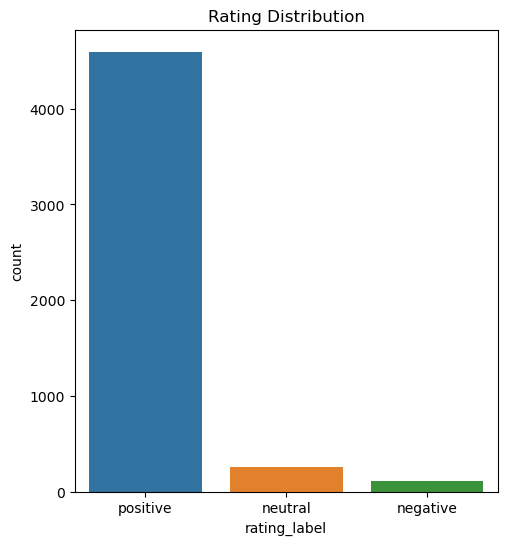

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x='rating_label', data=df_speakers)
plt.title('Rating Distribution')

In [51]:
#check the count of positive and negative reviews

df_speakers['rating_label'].value_counts()

positive    4595
neutral      252
negative     113
Name: rating_label, dtype: int64

In [53]:
#normalize count

df_speakers['rating_label'].value_counts(normalize=True)

positive    0.926411
neutral     0.050806
negative    0.022782
Name: rating_label, dtype: float64

In [56]:
#info of dataset

df_speakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 0 to 4959
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product       4960 non-null   object
 1   title         4960 non-null   object
 2   rating        4960 non-null   int32 
 3   body          4960 non-null   object
 4   rating_label  4960 non-null   object
dtypes: int32(1), object(4)
memory usage: 342.2+ KB


In [57]:
#describe numerical data in dataset

df_speakers.describe()

,rating
count,4960.000000
mean,4.690121
std,0.707565
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [66]:
# Perform tokenization and stemming on the reviews

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [72]:
#tokenizing reviews

df['body'] = df['body'].apply(lambda x: ' '.join([stemmer.stem(word) for 
                                                  word in word_tokenize(x.lower()) 
                                                  if word.isalnum() and word not in stop_words]))

In [73]:
# Split the data into training and testing sets with an 80/20 split

X = df['body']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Vectorize the text data using a CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [75]:
# Train a Naive Bayes classifier

clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [76]:
# Make predictions on the test data

y_pred = clf.predict(X_test_vectorized)

In [85]:
# Evaluate the performance of the classifier

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1-score:", round(f1*100, 2), '%')

Accuracy: 79.74 %
Precision: 72.1 %
Recall: 79.74 %
F1-score: 73.84 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


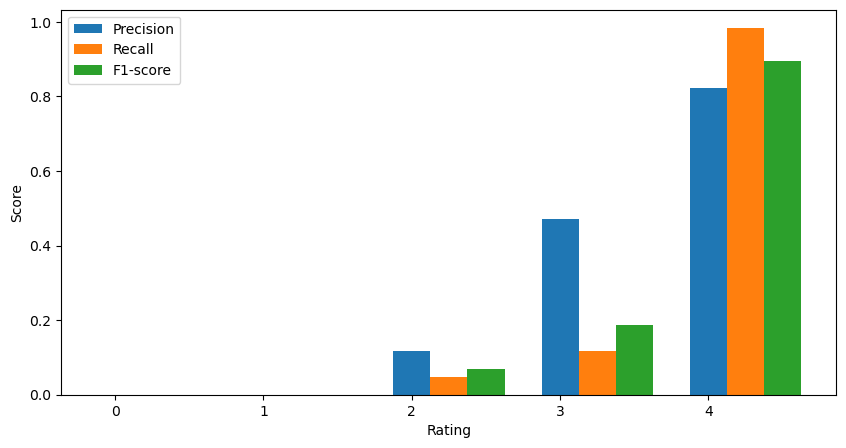

In [98]:
# Plot precision, recall, and F1-score for each class
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

plt.figure(figsize=(10, 5))
plt.bar(range(len(precision)), precision, width=0.25, label='Precision')
plt.bar([x + 0.25 for x in range(len(recall))], recall, width=0.25, label='Recall')
plt.bar([x + 0.5 for x in range(len(f1))], f1, width=0.25, label='F1-score')
plt.xticks(range(len(precision)), [format(i) for i in range(len(precision))])
plt.xlabel('Rating')
plt.ylabel('Score')
plt.legend()
plt.show()

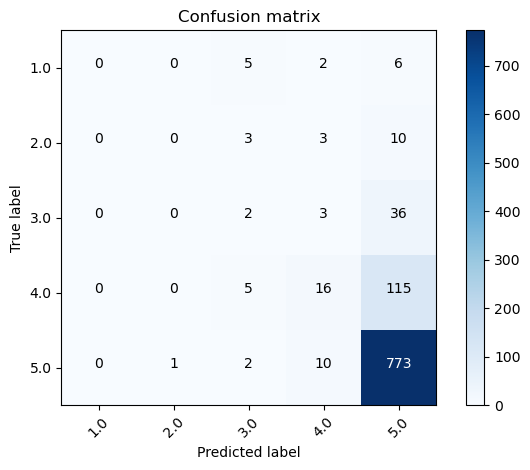

In [101]:
# Define the class labels

classes = np.unique(y_test)

# Define the plot style
cmap = plt.cm.Blues
normalize = False

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()